In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

In [2]:
a=0
b=1
c=3
numpts=32

In [3]:
f = lambda x: -1*(c+pi**2)*np.sin(pi*x)
u_ex = lambda x: np.sin(pi*x)

In [4]:
def BVP(a,b,u,f,numpts,plot=True):
    alpha=u(a)
    beta=u(b)
    xvec=np.linspace(a,b,numpts+1)
    h=xvec[1]-xvec[0]
    Amat=(np.identity(numpts-1)*(-2-c*h**2)+np.diag(np.ones(numpts-2),k=1)+np.diag(np.ones(numpts-2),k=-1))/h**2
    v=np.array([np.append(np.insert(np.zeros(numpts-3),0,alpha),beta)]).transpose()/h**2
    bvec=np.array([f(xvec[1:-1])]).transpose()-v
    uvec=np.matmul(np.linalg.inv(Amat),bvec)
    u_ext=np.array([u(xvec[1:-1])]).transpose()
    err=(h**0.5)*np.linalg.norm(uvec-u_ext,ord=2)
    if plot==True:
        plt.plot(xvec[1:-1],uvec)
        #plt.plot(xvec[1:-1],u_ext)
        plt.title(f'error={err:.1E} N={numpts}')
        plt.xlabel('$x$')
        plt.ylabel('$u(x)$')
        plt.savefig(f'hw_6_q_5_N_{numpts}')
    return err

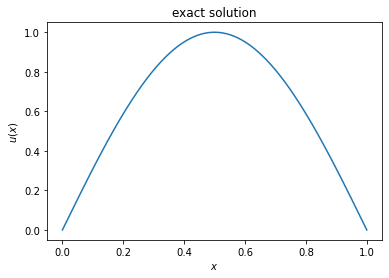

In [5]:
error=np.array([])
numpt_array=np.array([32,64,128,256])
for i in numpt_array:
    error =np.append(error,BVP(0,1,u_ex,f,i))
    plt.clf()
plt.plot(np.linspace(0,1,257),u_ex(np.linspace(0,1,257)))
plt.title('exact solution')
plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.savefig('exact_solution_hw_6_q_5')

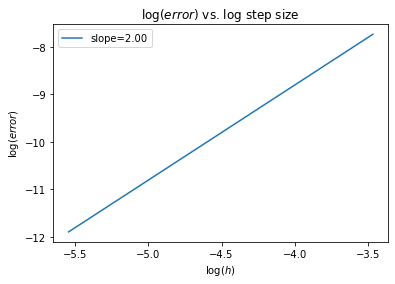

In [25]:
fit=np.polyfit(np.log(1/numpt_array),np.log(error),deg=1)
plt.plot(np.log(1/numpt_array),np.log(error),label=f"slope={fit[0]:.2f}")
plt.xlabel('$\log(h)$')
plt.ylabel('$\log(error)$')
plt.title('$\log(error)$ vs. log step size')
plt.legend()
plt.savefig('q_5_error_vs_step_size')